In [2]:
from google.colab import files
uploaded = files.upload()

Saving X_test.csv to X_test.csv
Saving X_train.csv to X_train.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

print(X_train.head())
print(y_train.head())

   is_tv_subscriber  is_movie_package_subscriber  subscription_age  bill_avg  \
0                 1                            0              1.01        13   
1                 1                            1              6.02        15   
2                 1                            1              1.76         0   
3                 1                            0              1.38        21   
4                 0                            0              0.53        21   

   reamining_contract  service_failure_count  download_avg  upload_avg  \
0                0.96                      1         137.6         7.3   
1                1.13                      0           3.8         1.1   
2                0.00                      0           0.0         0.0   
3                0.59                      0          87.1         3.1   
4                0.00                      0           0.0         0.0   

   download_over_limit  
0                    0  
1                    0  

In [4]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
dtype: int64
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
dtype: int64


In [5]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train.values.ravel())

print("Найкращі параметри: ", grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Найкращі параметри:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [7]:
from sklearn.metrics import classification_report

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      6532
           1       0.95      0.93      0.94      7923

    accuracy                           0.94     14455
   macro avg       0.94      0.94      0.94     14455
weighted avg       0.94      0.94      0.94     14455



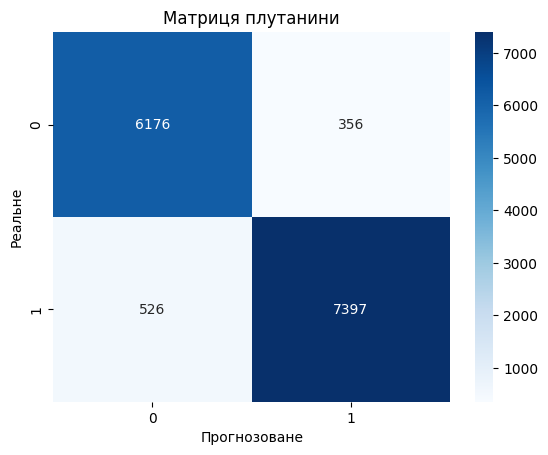

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Прогнозоване')
plt.ylabel('Реальне')
plt.title('Матриця плутанини')
plt.show()

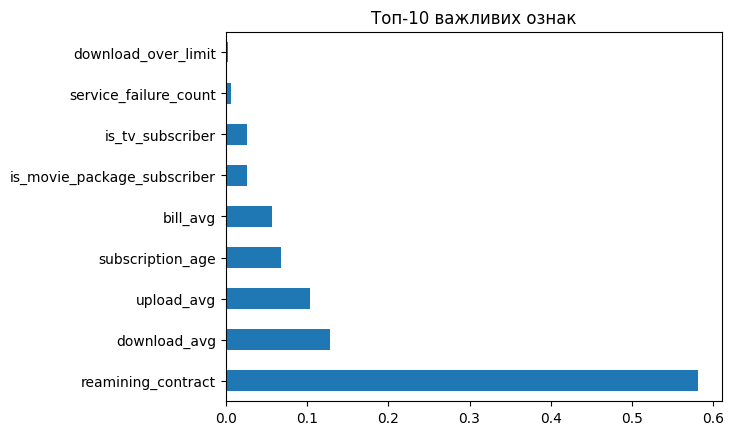

In [9]:
feature_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Топ-10 важливих ознак')
plt.show()

Судячи з результатів метрик якості, можна сказати, що модель дуже якісно навчена (точність вгадування класу 0 - 92%, а класу 1 - 95%).
Також бачимо, що найвпливовіша ознака - це remaining_contract, а найменш впливова ознака - це download_over_limit)

Збережемо нашу модель

In [10]:
import pickle

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [11]:
files.download('random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>